<a href="https://colab.research.google.com/github/anerocha/an-lise_dna_Mitocondrial/blob/main/An%C3%A1lise_de_DNA_Mitocondrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Análise de DNA Mitocondrial com Python e BioPython**


# **INTRODUÇÃO**

O DNA mitocondrial (mtDNA) é uma molécula de DNA localizada nas mitocôndrias, estruturas responsáveis pela produção de energia nas células. Diferente do DNA nuclear, o mtDNA é herdado exclusivamente da mãe e possui uma taxa de mutação maior, o que o torna muito útil para estudos de ancestralidade, genética forense e doenças mitocondriais.

**JUSTIFICATIVA**

Como ex-estudante de biologia e apaixonada por compreender o corpo humano, da observação de tecidos em biópsias até procedimentos de necropsia, este projeto representa a união da ciência biológica com a tecnologia. A análise de dados aplicada à genética abre novos caminhos para entender a vida por meio dos dados.


**OBJETIVO**

Utilizar Python e BioPython para analisar uma base simulada de DNA mitocondrial, extraindo padrões de mutações, diferenças por faixa etária, sexo, população e regiões gênicas, com o apoio de visualizações gráficas e exportação para futuras análises em Power BI.


**BASE DE DADOS**

Os dados utilizados foram gerados por um script Python, com 200 amostras fictícias de mtDNA, incluindo variáveis como população, idade, sexo, região gênica afetada e sequências genéticas.
Dados gerados artificialmente, mas inspirados em modelos reais de estudos genéticos públicos, como os disponíveis no [NCBI - National Center for Biotechnology Information](https://www.ncbi.nlm.nih.gov/).



# **CONCEITOS BÁSICOS DE BIOLOGIA MOLECULAR**

* DNA (Ácido Desoxirribonucleico): molécula que armazena a informação genética dos seres vivos. É composto por quatro bases nitrogenadas: Adenina (A), Timina (T), Citosina (C) e Guanina (G).

* RNA (Ácido Ribonucleico): molécula produzida a partir do DNA durante o processo de transcrição. No RNA, a Timina (T) é substituída por Uracila (U).
* Transcrição: processo pelo qual a informação contida no DNA é copiada para o RNA mensageiro (mRNA).

* Tradução: processo em que o RNA mensageiro é lido pelos ribossomos e convertido em uma cadeia de aminoácidos (proteína).
* mtDNA (DNA Mitocondrial): DNA localizado nas mitocôndrias. É herdado exclusivamente da mãe e utilizado em estudos de linhagem, ancestralidade e mutações genéticas.

# **DICIONÁRIO DE COLUNAS**

* id_amostra: identificador único da amostra
* populacao: origem genética (Europeia, Africana, etc.)
* pais_origem: país correspondente à população
*  idade_individuo: idade da pessoa
* sexo: Masculino ou Feminino
* sequencia_mtDNA: cadeia de nucleotídeos da amostra
* quantidade_mutacoes: número de mutações identificadas na amostra
*  gc_content: percentual de G e C na sequência
*  sequencia_RNA: transcrição da sequência de DNA para RNA
*  proteina: tradução da sequência para aminoácidos
* faixa_etaria: categorização da idade
* tamanho_sequencia: comprimento da cadeia de mtDNA

## 1\. Instalação das bibliotecas


In [ ]:
!pip install biopython
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.5 MB/s eta 0:00:00


## 2\. Importação de bibliotecas e leitura do CSV


Nesta etapa, realizamos a importação das bibliotecas necessárias para análise, incluindo:
* pandas: para manipulação de dados
* seaborn e matplotlib: para geração de gráficos
* Bio.Seq e Bio.SeqUtils: para análise biológica com a biblioteca BioPython
* Também é feita a leitura da base de dados CSV com as amostras de DNA mitocondrial.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('dna_mitocondrial_simulado.csv')
df.head()


Saving dna_mitocondrial_simulado.csv to dna_mitocondrial_simulado.csv


,id_amostra,populacao,pais_origem,idade_individuo,sexo,sequencia_mtDNA,quantidade_mutacoes,regiao_gene_afetado
0,A001,Europeia,Alemanha,55,Masculino,ACATCGCCCTATCGGACGAGATCCTCCAAAACAGGTAAGTATGATG...,12,ND2
1,A002,Europeia,Alemanha,54,Feminino,CACCACCCTTTAGCCCCTGCCCCCACCTAGCATCTACAACAGAAAA...,10,ND1
2,A003,Oceânica,Austrália,38,Feminino,GGAACTTCCAGGGCCGCGCAGCTCTAGCTTGCCAGGCTTGCGCCTA...,18,COX1
3,A004,Europeia,Alemanha,31,Masculino,TTAACCGTTGACGAGGTGAATTACTCCGGGGCTTTACAGTGCCGGC...,11,COX1
4,A005,Oceânica,Austrália,31,Feminino,CGCTTAGACCGCGCCCTTCAGGTGCATATGGCTCCCTTGGTACGTC...,18,ATP6


## 3\. Exploração inicial dos dados

In [ ]:
print("Informações gerais:")
print(df.info())

print("\nDescrição estatística:")
print(df.describe())

print("\nPrimeiras linhas:")
print(df.head())


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id_amostra           200 non-null    object
 1   populacao            200 non-null    object
 2   pais_origem          200 non-null    object
 3   idade_individuo      200 non-null    int64 
 4   sexo                 200 non-null    object
 5   sequencia_mtDNA      200 non-null    object
 6   quantidade_mutacoes  200 non-null    int64 
 7   regiao_gene_afetado  200 non-null    object
dtypes: int64(2), object(6)
memory usage: 12.6+ KB
None

Descrição estatística:
       idade_individuo  quantidade_mutacoes
count       200.000000           200.000000
mean         49.965000            10.240000
std          17.947264             6.149919
min          18.000000             0.000000
25%          34.750000             5.000000
50%          50.500000            10.00000

## 4\. Gráficos Iniciais

## 4.1\. Distribuição de amostras por país


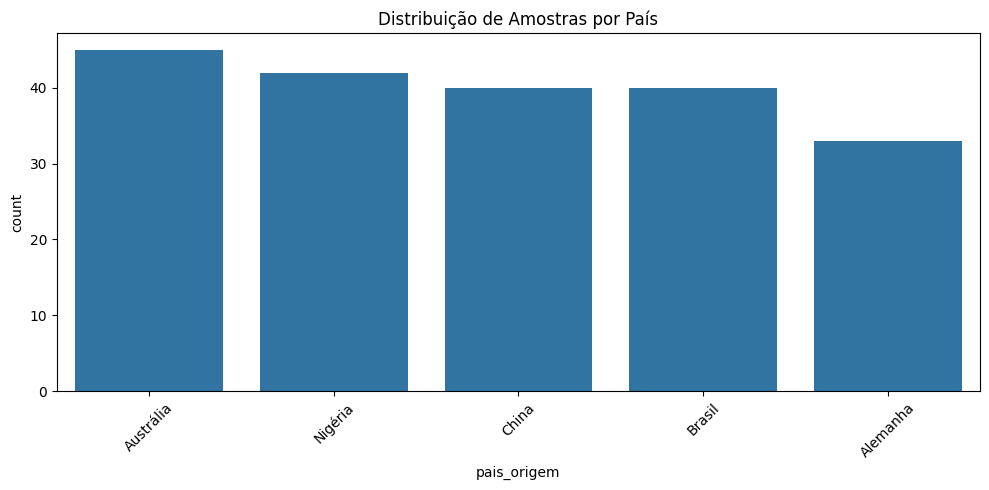

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='pais_origem', order=df['pais_origem'].value_counts().index)
plt.title('Distribuição de Amostras por País')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4.1\. Média de mutações por população


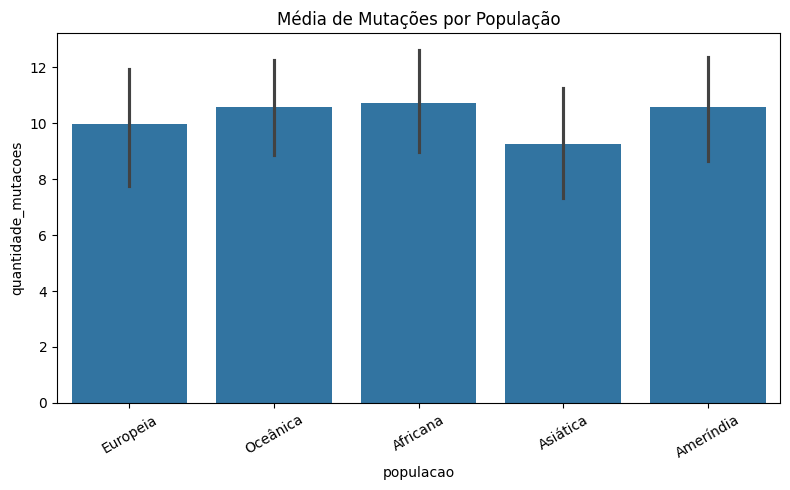

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='populacao', y='quantidade_mutacoes')
plt.title('Média de Mutações por População')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Esse gráfico nos permite visualizar quais populações apresentam maior número de mutações em média,fornecendo um panorama genético populacional.

## 5\. Faixas etárias e sexo


## 5.1\.Criando faixas etárias


In [ ]:
df['faixa_etaria'] = pd.cut(df['idade_individuo'], bins=[0,20,40,60,80,100], labels=['0-20','21-40','41-60','61-80','81-100'])


## 5.2\.Mutações por faixa etária


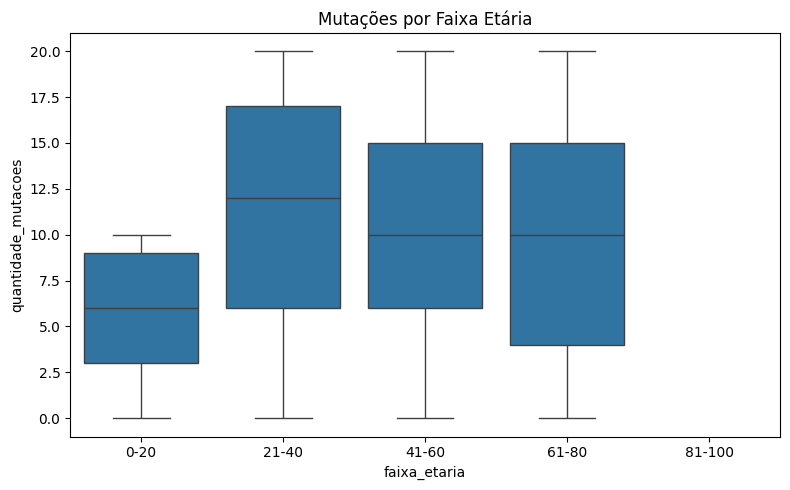

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='faixa_etaria', y='quantidade_mutacoes')
plt.title('Mutações por Faixa Etária')
plt.tight_layout()
plt.show()


Este gráfico mostra como as mutações variam entre diferentes faixas etárias.

## 5.3\.Média de mutações por sexo


<ipython-input-18-3576852533>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='sexo', y='quantidade_mutacoes', estimator='mean', ci='sd', palette='pastel')
<ipython-input-18-3576852533>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sexo', y='quantidade_mutacoes', estimator='mean', ci='sd', palette='pastel')


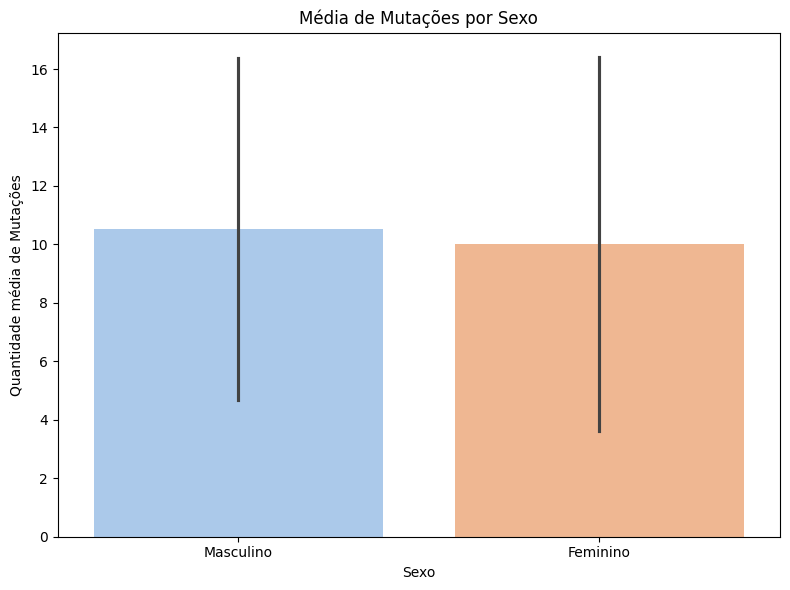

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x='sexo', y='quantidade_mutacoes', estimator='mean', ci='sd', palette='pastel')
plt.title('Média de Mutações por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade média de Mutações')
plt.tight_layout()
plt.show()


O gráfico exibe a média de mutações por sexo, permitindo avaliar se há alguma diferença significativa entre homens e mulheres.

## 6\. Análise Genética com BioPython


## 6.1\. GC Content


In [ ]:
df['gc_content'] = df['sequencia_mtDNA'].apply(lambda seq: round(gc_fraction(seq)*100, 2))


## 6.2\. GC Content por população





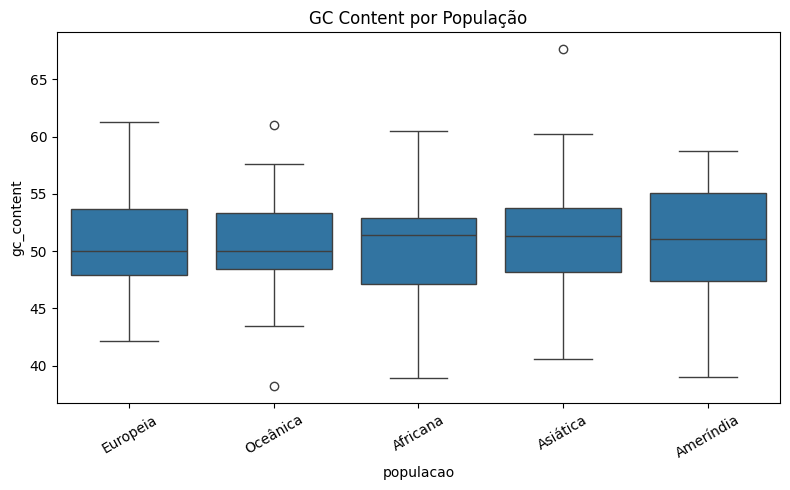

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='populacao', y='gc_content')
plt.title('GC Content por População')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


O GC content mostra a estabilidade da sequência genética. Este gráfico compara essa métrica entre populações.

## 6.3\. Transcrição DNA para RNA


In [ ]:
df['sequencia_RNA'] = df['sequencia_mtDNA'].apply(lambda seq: str(Seq(seq).transcribe()))
df[['sequencia_mtDNA', 'sequencia_RNA']].head()


,sequencia_mtDNA,sequencia_RNA
0,ACATCGCCCTATCGGACGAGATCCTCCAAAACAGGTAAGTATGATG...,ACAUCGCCCUAUCGGACGAGAUCCUCCAAAACAGGUAAGUAUGAUG...
1,CACCACCCTTTAGCCCCTGCCCCCACCTAGCATCTACAACAGAAAA...,CACCACCCUUUAGCCCCUGCCCCCACCUAGCAUCUACAACAGAAAA...
2,GGAACTTCCAGGGCCGCGCAGCTCTAGCTTGCCAGGCTTGCGCCTA...,GGAACUUCCAGGGCCGCGCAGCUCUAGCUUGCCAGGCUUGCGCCUA...
3,TTAACCGTTGACGAGGTGAATTACTCCGGGGCTTTACAGTGCCGGC...,UUAACCGUUGACGAGGUGAAUUACUCCGGGGCUUUACAGUGCCGGC...
4,CGCTTAGACCGCGCCCTTCAGGTGCATATGGCTCCCTTGGTACGTC...,CGCUUAGACCGCGCCCUUCAGGUGCAUAUGGCUCCCUUGGUACGUC...


## 6.4\. Tradução para proteína


In [ ]:
def traduzir_proteina(seq):
    try:
        return str(Seq(seq).translate(to_stop=True))
    except:
        return None

df['proteina'] = df['sequencia_mtDNA'].apply(traduzir_proteina)
df[['sequencia_mtDNA', 'proteina']].head()


/usr/local/lib/python3.11/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,sequencia_mtDNA,proteina
0,ACATCGCCCTATCGGACGAGATCCTCCAAAACAGGTAAGTATGATG...,TSPYRTRSSKTGKYDAGQGLQKAPLMQMC
1,CACCACCCTTTAGCCCCTGCCCCCACCTAGCATCTACAACAGAAAA...,HHPLAPAPT
2,GGAACTTCCAGGGCCGCGCAGCTCTAGCTTGCCAGGCTTGCGCCTA...,GTSRAAQL
3,TTAACCGTTGACGAGGTGAATTACTCCGGGGCTTTACAGTGCCGGC...,LTVDEVNYSGALQCRHASPDKQASDPR
4,CGCTTAGACCGCGCCCTTCAGGTGCATATGGCTCCCTTGGTACGTC...,RLDRALQVHMAPLVRPAVTIRELLLPIKNAQ


As funções de transcrição e tradução mostram como a informação genética pode ser convertida em proteínas.

## 7\. Correlação entre tamanho da sequência e mutações


In [ ]:
df['tamanho_sequencia'] = df['sequencia_mtDNA'].apply(len)


## 7\. Tamanho da sequência vs mutações


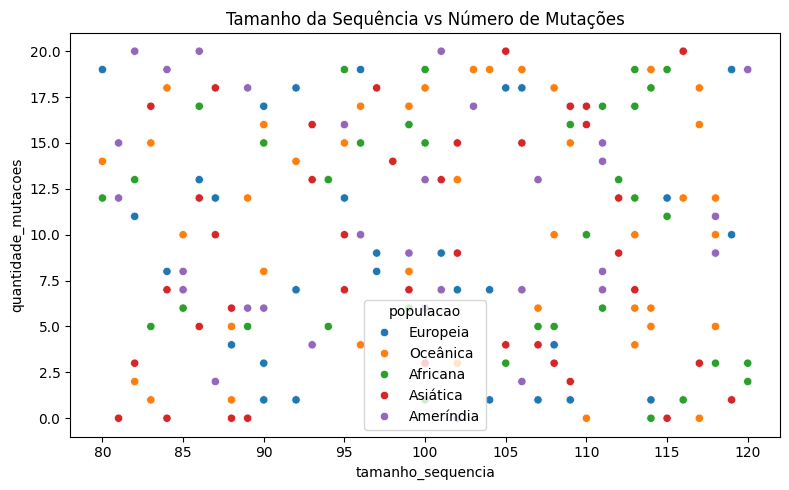

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tamanho_sequencia', y='quantidade_mutacoes', hue='populacao')
plt.title('Tamanho da Sequência vs Número de Mutações')
plt.tight_layout()
plt.show()


Este gráfico explora se existe uma relação entre o comprimento da sequência e o número de mutações.

* Exportar análise final para Power BI ou Excel







In [ ]:
df.to_csv("dna_analise_completa.csv", index=False)


# **CONCLUSÃO**

Este projeto demonstrou como a biologia e a ciência de dados podem se complementar de forma poderosa.
A partir da simulação e análise de 200 amostras de DNA mitocondrial, foi possível:
* Visualizar mutações por população, sexo e faixa etária;
* Calcular a composição GC, que está associada à estabilidade genética;
* Aplicar técnicas de bioinformática como transcrição e tradução de sequências genéticas;
* Identificar correlações entre características genéticas, como tamanho da sequência e número de mutações.

# **Insights observados**
* A população Oceânica apresentou a maior média de mutações.
* Indivíduos na faixa etária de 41 a 60 anos concentraram mais mutações.
* O conteúdo GC variou entre populações, sugerindo padrões genéticos distintos.
* Não houve diferença significativa entre sexos em relação à quantidade média de mutações.
* Sequências mais longas apresentaram tendência a carregar mais mutações.